# Imports

In [103]:
import fiona
import pandas as pd
import geopandas as gpd
import csv
import seaborn as sns
import numpy as np

In [104]:
from collections import OrderedDict
name_of_file = 'water_1d_outputs_md5_6af4c7347dfbcdc8cf9b5daf80ac8909.gpkg'

layers = fiona.listlayers(name_of_file)
layers

OSError: no such file or directory: 'water_1d_outputs_md5_6af4c7347dfbcdc8cf9b5daf80ac8909.gpkg'

In [ ]:
# Data exploration

In [105]:
# all_datasets = dict()

data = gpd.read_file(name_of_file, layer='grid_1_degree')
data.head()

OSError: no such file or directory: 'water_1d_outputs_md5_6af4c7347dfbcdc8cf9b5daf80ac8909.gpkg'

In [106]:
def poly_to_lat_long(poly):

    lats = list(poly.exterior.coords.xy[0])
    longs = list(poly.exterior.coords.xy[1])
    return list(zip(lats, longs))

In [107]:
data['geometry'] = data['geometry'].apply(lambda x: poly_to_lat_long(x))

AttributeError: 'list' object has no attribute 'exterior'

In [ ]:
data.head(1)

In [ ]:
data.columns

# Create the datasets

In [67]:
def create_dataset(field,percentages): 
        # field is '_nc_degree',...
        # percentages takes True or False to specify if we want percentages in cur data
        
    if (percentages):
        multiplier = 100
    else:
        multiplier = 1
    dataset = data[['water_cur'+field,'geometry']].copy()
    dataset['water_cur'+field] = dataset['water_cur'+field]*multiplier
    dataset['c_ssp1'] = (data['water_ssp5'+field] - data['water_cur'+field])*100/data['water_cur'+field]
    dataset['c_ssp3'] = (data['water_ssp3'+field] - data['water_cur'+field])*100/data['water_cur'+field]
    dataset['c_ssp5'] = (data['water_ssp5'+field] - data['water_cur'+field])*100/data['water_cur'+field]
    dataset.columns = ['2015','coordinates','SSP1','SSP3','SPP5']
    for i in range(5):
        dataset['lat'+str(i+1)] = dataset.coordinates.apply(lambda x : x[i][0])
        dataset['long'+str(i+1)] = dataset.coordinates.apply(lambda x : x[i][1])
    dataset = dataset.fillna(0)
    dataset = dataset.drop(columns=['coordinates'])
    dataset.to_csv(field[1:]+'.csv', sep=',')
    return dataset

## NCWP

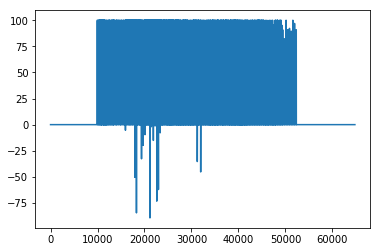

In [68]:
ncwp = create_dataset('_nc_degree',True)
ncwp['2015'].plot();

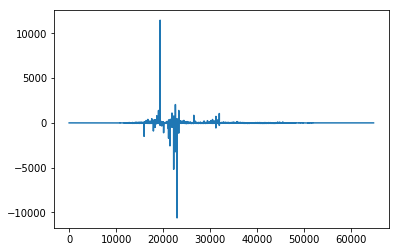

In [69]:
ncwp['SSP1'].plot();

In [70]:
ncwp.head(5)

,2015,SSP1,SSP3,SPP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
0,0.0,0.0,0.0,0.0,-179.0,89.0,-180.0,89.0,-180.0,90.0,-179.0,90.0,-179.0,89.0
1,0.0,0.0,0.0,0.0,-178.0,89.0,-179.0,89.0,-179.0,90.0,-178.0,90.0,-178.0,89.0
2,0.0,0.0,0.0,0.0,-177.0,89.0,-178.0,89.0,-178.0,90.0,-177.0,90.0,-177.0,89.0
3,0.0,0.0,0.0,0.0,-176.0,89.0,-177.0,89.0,-177.0,90.0,-176.0,90.0,-176.0,89.0
4,0.0,0.0,0.0,0.0,-175.0,89.0,-176.0,89.0,-176.0,90.0,-175.0,90.0,-175.0,89.0


## Nitrogen Load

In [71]:
data.columns

Index(['water_cur_n_export_degree', 'water_ssp5_n_export_degree',
       'water_cur_n_load_degree', 'water_ssp1_n_load_degree',
       'water_ssp1_n_export_degree', 'water_cur_rural_pop_degree',
       'water_ssp5_n_load_degree', 'water_ssp5_rural_pop_degree',
       'water_ssp3_n_export_degree', 'water_ssp3_n_load_degree',
       'water_ssp1_rural_pop_degree', 'water_ssp3_rural_pop_degree',
       'water_cur_nc_degree', 'water_cur_c_n_export_degree',
       'water_ssp1_nc_degree', 'water_ssp1_c_n_export_degree',
       'water_ssp3_nc_degree', 'water_ssp3_c_n_export_degree',
       'water_ssp5_nc_degree', 'water_ssp5_c_n_export_degree', 'geometry'],
      dtype='object')

In [73]:
tot_nit = create_dataset('_n_load_degree',False)
tot_nit.head()

,2015,SSP1,SSP3,SPP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
0,0.0,0.0,0.0,0.0,-179.0,89.0,-180.0,89.0,-180.0,90.0,-179.0,90.0,-179.0,89.0
1,0.0,0.0,0.0,0.0,-178.0,89.0,-179.0,89.0,-179.0,90.0,-178.0,90.0,-178.0,89.0
2,0.0,0.0,0.0,0.0,-177.0,89.0,-178.0,89.0,-178.0,90.0,-177.0,90.0,-177.0,89.0
3,0.0,0.0,0.0,0.0,-176.0,89.0,-177.0,89.0,-177.0,90.0,-176.0,90.0,-176.0,89.0
4,0.0,0.0,0.0,0.0,-175.0,89.0,-176.0,89.0,-176.0,90.0,-175.0,90.0,-175.0,89.0


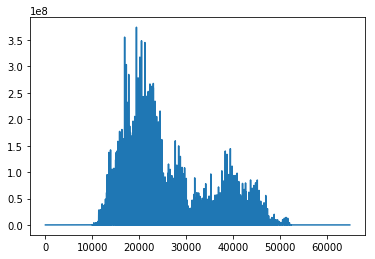

In [74]:
tot_nit['2015'].plot();

In [76]:
tot_nit.describe()

,2015,SSP1,SSP3,SPP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,6.480000e+04,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000
mean,3.511533e+06,23.862889,29.338880,23.862889,0.499985,-0.500000,-0.500000,-0.499985,-0.499985,0.500000,0.500000,0.499985,0.499985,-0.500000
std,1.633419e+07,564.014626,611.278078,564.014626,103.923423,51.961123,103.923449,51.961097,103.923476,51.961123,103.923449,51.961150,103.923423,51.961123
min,0.000000e+00,-89.994782,-92.286612,-89.994782,-179.000000,-90.000000,-180.000000,-90.000000,-180.000000,-89.000000,-179.000000,-90.000000,-179.000000,-90.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,-89.250000,-45.250000,-90.250000,-45.250000,-90.250000,-44.250000,-89.250000,-44.250000,-89.250000,-45.250000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.500000,-0.500000,-0.500000,-0.500000,-0.500000,0.500000,0.500000,0.500000,0.500000,-0.500000
75%,0.000000e+00,0.000000,0.000000,0.000000,90.250000,44.250000,89.250000,44.250000,89.250000,45.250000,90.250000,45.250000,90.250000,44.250000
max,3.742737e+08,80405.997245,71637.942719,80405.997245,180.000000,89.000000,179.000000,89.000000,180.000000,90.000000,180.000000,90.000000,180.000000,89.000000


## Nitrogen Export

In [78]:
nit_exp = create_dataset('_n_export_degree',False)
nit_exp.describe()

,2015,SSP1,SSP3,SPP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,6.480000e+04,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000
mean,1.109785e+06,1.060176,3.304753,1.060176,0.499985,-0.500000,-0.500000,-0.499985,-0.499985,0.500000,0.500000,0.499985,0.499985,-0.500000
std,5.238914e+06,215.146196,215.366536,215.146196,103.923423,51.961123,103.923449,51.961097,103.923476,51.961123,103.923449,51.961150,103.923423,51.961123
min,0.000000e+00,-99.858768,-99.833008,-99.858768,-179.000000,-90.000000,-180.000000,-90.000000,-180.000000,-89.000000,-179.000000,-90.000000,-179.000000,-90.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,-89.250000,-45.250000,-90.250000,-45.250000,-90.250000,-44.250000,-89.250000,-44.250000,-89.250000,-45.250000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.500000,-0.500000,-0.500000,-0.500000,-0.500000,0.500000,0.500000,0.500000,0.500000,-0.500000
75%,0.000000e+00,0.000000,0.000000,0.000000,90.250000,44.250000,89.250000,44.250000,89.250000,45.250000,90.250000,45.250000,90.250000,44.250000
max,1.714816e+08,54237.902832,54179.095459,54237.902832,180.000000,89.000000,179.000000,89.000000,180.000000,90.000000,180.000000,90.000000,180.000000,89.000000


## Rural Population:

In [98]:
name = 'rural_pop'
rural_pop = create_dataset('_'+name+'_degree',False)
rural_pop.describe()

,2015,SSP1,SSP3,SPP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,6.480000e+04,64800.000000,6.480000e+04,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000
mean,6.595977e+04,-2.312935,inf,-2.312935,0.499985,-0.500000,-0.500000,-0.499985,-0.499985,0.500000,0.500000,0.499985,0.499985,-0.500000
std,4.396986e+05,23.638963,NaN,23.638963,103.923423,51.961123,103.923449,51.961097,103.923476,51.961123,103.923449,51.961150,103.923423,51.961123
min,0.000000e+00,-100.000000,-1.000000e+02,-100.000000,-179.000000,-90.000000,-180.000000,-90.000000,-180.000000,-89.000000,-179.000000,-90.000000,-179.000000,-90.000000
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,-89.250000,-45.250000,-90.250000,-45.250000,-90.250000,-44.250000,-89.250000,-44.250000,-89.250000,-45.250000
50%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.500000,-0.500000,-0.500000,-0.500000,-0.500000,0.500000,0.500000,0.500000,0.500000,-0.500000
75%,0.000000e+00,0.000000,0.000000e+00,0.000000,90.250000,44.250000,89.250000,44.250000,89.250000,45.250000,90.250000,45.250000,90.250000,44.250000
max,1.667823e+07,191.608588,inf,191.608588,180.000000,89.000000,179.000000,89.000000,180.000000,90.000000,180.000000,90.000000,180.000000,89.000000


In [99]:
rural_pop = rural_pop.replace([np.inf, -np.inf], [1000,-1000])
rural_pop.describe()

,2015,SSP1,SSP3,SPP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,6.480000e+04,64800.000000,64800.00000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000
mean,6.595977e+04,-2.312935,4.72085,-2.312935,0.499985,-0.500000,-0.500000,-0.499985,-0.499985,0.500000,0.500000,0.499985,0.499985,-0.500000
std,4.396986e+05,23.638963,32.24826,23.638963,103.923423,51.961123,103.923449,51.961097,103.923476,51.961123,103.923449,51.961150,103.923423,51.961123
min,0.000000e+00,-100.000000,-100.00000,-100.000000,-179.000000,-90.000000,-180.000000,-90.000000,-180.000000,-89.000000,-179.000000,-90.000000,-179.000000,-90.000000
25%,0.000000e+00,0.000000,0.00000,0.000000,-89.250000,-45.250000,-90.250000,-45.250000,-90.250000,-44.250000,-89.250000,-44.250000,-89.250000,-45.250000
50%,0.000000e+00,0.000000,0.00000,0.000000,0.500000,-0.500000,-0.500000,-0.500000,-0.500000,0.500000,0.500000,0.500000,0.500000,-0.500000
75%,0.000000e+00,0.000000,0.00000,0.000000,90.250000,44.250000,89.250000,44.250000,89.250000,45.250000,90.250000,45.250000,90.250000,44.250000
max,1.667823e+07,191.608588,1000.00000,191.608588,180.000000,89.000000,179.000000,89.000000,180.000000,90.000000,180.000000,90.000000,180.000000,89.000000


## Quantiles:

In [102]:
quantile_values = 5 * np.arange(1,21)

quantiles = pd.DataFrame()
for q in quantile_values:
    quantiles.loc['nc_degree',str(q)] =q
    quantiles.loc['tot_nit',str(q)] = tot_nit['2015'].quantile(q/100)
    quantiles.loc['nit_exp',str(q)] = nit_exp['2015'].quantile(q/100)
    quantiles.loc[name,str(q)] = rural_pop['2015'].quantile(q/100)
quantiles

,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
nc_degree,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,8.500000e+01,9.000000e+01,9.500000e+01,100.0
tot_nit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83835.0,2.812180e+06,6.268922e+06,1.439928e+07,374273728.0
nit_exp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.153239e+05,2.335226e+06,5.766457e+06,171481584.0
rural_pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.279561e+03,4.024640e+04,2.196601e+05,16678228.0


In [ ]:
quantiles.to_csv('water_quantiles.csv', sep=',')